<a href="https://colab.research.google.com/github/kristianJW54/Supervised_ML_Model_Builds/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression


---

Logistic regression is used in classification and unlike linear regression, logistic regression will deal with binary values such as 0 and 1 rather than continuous variables as seen in linear models

The goal of logistic regression is to use a threshhold to predict and classify a feature/label. This is visualised as an S shaped curve on a graph

#### Sigmoid Function

In Linear Regression the function to predict features was $f(x) = x_i * m + b$

For Logistic Regression this function will not work as the variables are binary consisting of either 0 or 1 so drawin a line between the two to classify will be less accurate.

The sigmoid function is therefore used to give a more accurate threshhold for predictions

**Sigmoid Function**

$g(z) = {1\over 1 + e{^-z}}$

To compute this function we must first calculate z which will be similar to the linear function $f(x)$

$z = w · x + b$

**The output of the sigmoid function will be between 0 and 1**

**Our function becomes**

$f_w,_b(x) = g(w ⋅ x + b) = {1\over 1 + e^{w ⋅ x + b}}$



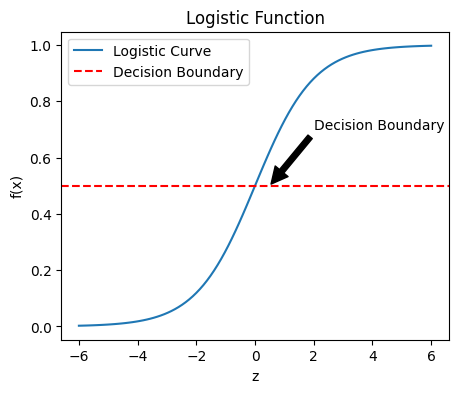

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic function
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x_values = np.linspace(-6, 6, 100)

# Calculate corresponding y values using the logistic function
y_values = logistic_function(x_values)

# Plot the S-shaped curve
plt.figure(figsize=(5,4))
plt.plot(x_values, y_values, label='Logistic Curve')
plt.xlabel('z')
plt.ylabel('f(x)')
plt.title('Logistic Function')

# Add decision boundary
plt.axhline(y=0.5, color='r', linestyle='--', label='Decision Boundary')
plt.annotate('Decision Boundary', xy=(0.5, 0.5), xytext=(2, 0.7),
             arrowprops=dict(facecolor='black', shrink=0.03))

plt.legend()
plt.show()


To interpret the above graph and how the decision boundary helps with classification, we see that the $g(z)$ logistic function predicts y as 1 for when $f(z)$ is greater or equal to 0.5 as seen on the decision boundary. This works more like a probability of what the model will classify the data point as. So when $g(z)$ is greater than 0.5 $f(z)$ will also be greater than 0.5. We then have to look at when $g(z)$ is greater than 0.5, this is when $z$ is greater than 0.

So simply put, $g(z)$ is above the decision boundary, when $z$ is greater than zero or on the right half of the graph.

How do we know when $z$ is greater than zero? Well, $z = w · x + b$

#### Cost Function for Logistic Regression

For logistic regression, the loss function or cost is slightly different to linear regression. Here we will be taking the loss given $f(x)$ and $y$

$L(f_w,_b(x^{i},y^{i}) = -log(f_w,_b(x^{i})$ if $y = 1$ OR $-log(1-f_w,_b(x^{i}) $ if $y = 0$

**If Y = 1:**

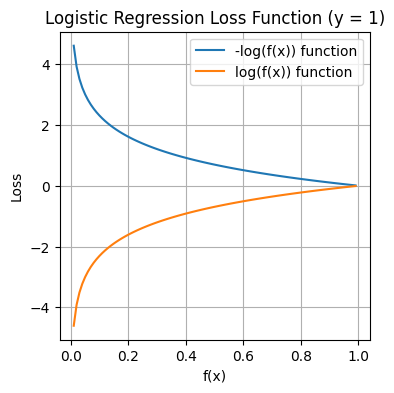

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values representing probabilities from 0 to 1
x_values = np.linspace(0.01, 0.99, 100)  # Avoiding 0 and 1 to avoid infinity in log

# Calculate the logistic regression loss function for y = 1
loss_values = -np.log(x_values)
pos_loss_values = np.log(x_values)


# Plot the loss function
plt.figure(figsize=(4,4))
plt.plot(x_values, loss_values, label='-log(f(x)) function')
plt.plot(x_values, pos_loss_values, label='log(f(x)) function')
plt.xlabel('f(x)')
plt.ylabel('Loss')
plt.title('Logistic Regression Loss Function (y = 1)')

plt.annotate("-log(f(x)) descent line", xy=(2,0.6), xytext=(4,0.8),
             arrowprops=dict(facecolor='black', shrink=0.03))

plt.legend()
plt.grid(True)
plt.show()


Here the loss function if y = 1 takes the logarithm of the function f(x) and on a graph that is represented as a curved line where the loss approaches zero the closer it gets to 1

The reason we use -log is to ensure that the direction of the loss function, aligns with the descent from 1 to 0 as we have established, the output of the $g(z)$ function is classified as 1 where $z$ is greater than zero.

In the case of our cost function and classification, the cost function pushes the algorithm to make more accurate predictions by encouraging predictions with lower costs as they are closer to 1 which is our predicted label.

**If Y = 0:**

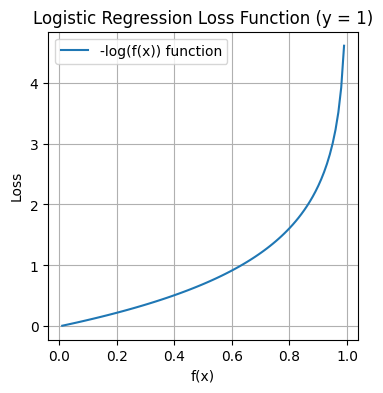

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values representing probabilities from 0 to 1
x_values = np.linspace(0.01, 0.99, 100)  # Avoiding 0 and 1 to avoid infinity in log

# Calculate the logistic regression loss function for y = 1
loss_values = -np.log(1 - x_values)


# Plot the loss function
plt.figure(figsize=(4,4))
plt.plot(x_values, loss_values, label='-log(f(x)) function')

plt.xlabel('f(x)')
plt.ylabel('Loss')
plt.title('Logistic Regression Loss Function (y = 1)')

plt.annotate("-log(f(x)) descent line", xy=(2,0.6), xytext=(4,0.8),
             arrowprops=dict(facecolor='black', shrink=0.03))

plt.legend()
plt.grid(True)
plt.show()

**Using this function we can create a loss function for $J(w,b)$ which is ${1\over m} ∑^{m}_{i=1} = L(F_w,_b(x,^{(i)}),y^{(i)})$**

If we can then minimise the parameters w,b we will then be able to create a model which accurately classifies our data

####Loss Simplified

We can simplify the function further to:

$L(F_w,_b(x^{(i)}), y^{(i)}) = -y^{(i)}log(F_w,_b(x^{(i)})) - (1-y^{(i)})log(1-F_w,_b(x^{(i)}))$

####Application in code:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])



In [ ]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    cost = cost / m
    return cost

In [ ]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

0.36686678640551745


####Gradient Descent

The gradient descent formula and the partial derivatives for the gradient is the same/similar to linear regression. The change comes in the form of our function $F_w,_b(x^{(i)})$ which is different.



In [ ]:
def compute_gradient_logistic(X, y, w, b):
    """
    Computes the gradient for logistic regression

    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    return dj_db, dj_dw

In [ ]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [ ]:
import copy


def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Performs batch gradient descent

    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history         #return final w,b and J history for graphing

In [ ]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837
